In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
prosp_pib = pd.read_csv('../BDD/perspective-pib-ocde.csv', sep=';')
prosp_pop = pd.read_csv('../BDD/population-perspective-UNO.csv', sep=';')

In [14]:
ch_table = pd.merge(prosp_pop, prosp_pib, left_on =['Time'], right_on=['TIME'])
ch_table = ch_table[ch_table.Location == "China" ]
ch_table = ch_table[ch_table.LOCATION=='CHN']
ch_table.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
3658,156,China,2,Medium,2016,2016.5,726052.413,687996.940,1414049.353,150.620,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2016,19446705.92
27031,156,China,2,Medium,2017,2017.5,729462.380,691559.414,1421021.794,151.362,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2017,20788528.63
50404,156,China,2,Medium,2018,2018.5,732677.783,694970.006,1427647.789,152.068,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2018,22173019.96
73777,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1433783.692,152.722,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2019,23601365.67
129000,156,China,2,Medium,2020,2020.5,738247.340,701076.434,1439323.774,153.312,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2020,24896400.00


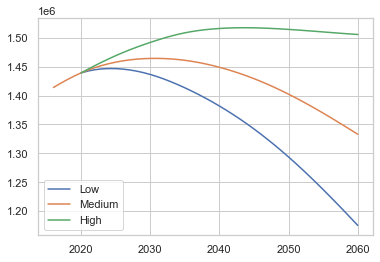

In [15]:
low= ch_table[ch_table.Variant=="Low"]
medium= ch_table[ch_table.Variant=="Medium"]
high= ch_table[ch_table.Variant=="High"]
plt.plot(low['Time'],low['PopTotal'], label='Low')
plt.plot(medium['Time'],medium['PopTotal'], label='Medium')
plt.plot(high['Time'],high['PopTotal'], label='High')
plt.legend()

Text(0.5, 1.0, 'GDP per capita projections (UNO)')

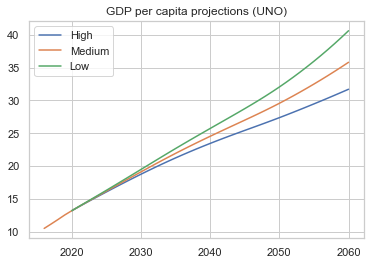

In [16]:
gdpc_m = (medium['Value']/medium['PopTotal'])*(10.26168/13.453050)
gdpc_l = (low['Value']/low['PopTotal'])*(10.26168/13.453050)
gdpc_h = (high['Value']/high['PopTotal'])*(10.26168/13.453050)
plt.plot(low['Time'],gdpc_h, label='High')
plt.plot(medium['Time'],gdpc_m, label='Medium')
plt.plot(high['Time'],gdpc_l, label='Low')
plt.legend()
plt.title("GDP per capita projections (UNO)")

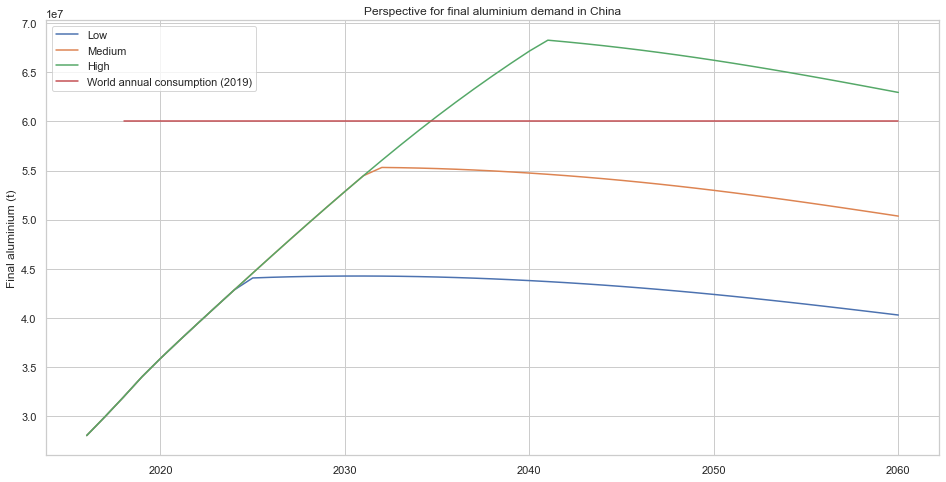

In [17]:
import metalsprospective as mp
plt.figure(figsize=(16,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal'], label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal'], label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal'], label= "High")
plt.plot([2018,2060], [6*10**7, 6*10**7], label="World annual consumption (2019)")
plt.ylabel("Final aluminium (t)")
plt.title("Perspective for final aluminium demand in China")
plt.legend()

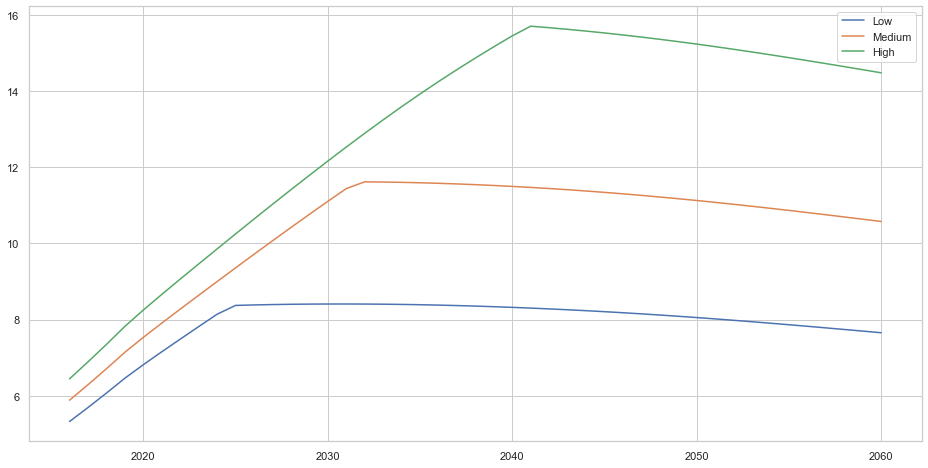

In [18]:

plt.figure(figsize=(16,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal']*190*10**-9, label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal']*210*10**-9, label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal']*230*10**-9, label= "High")
plt.legend()

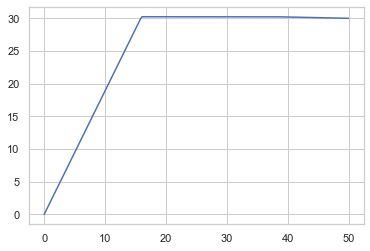

In [19]:
plt.plot(np.linspace(0,50, 200), mp.fADC(np.linspace(0,50, 200),  17/9,-0.02,16,38))

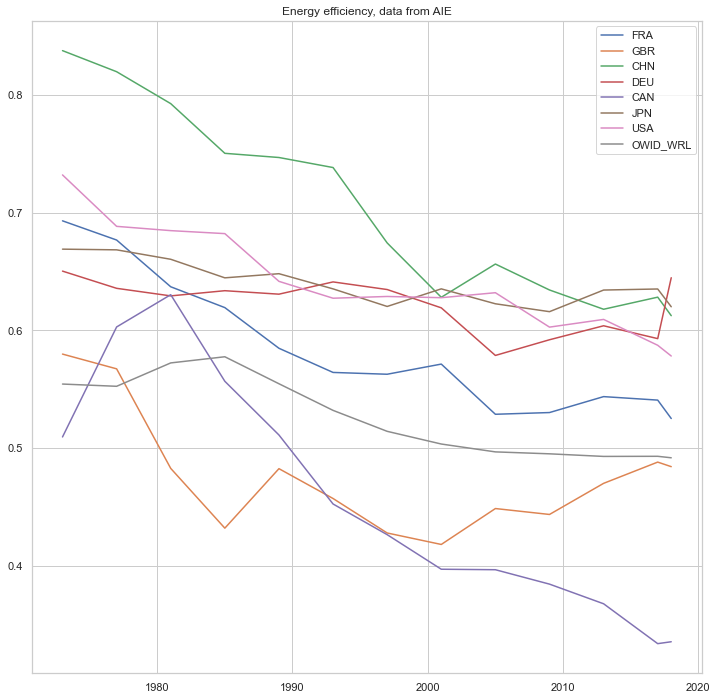

In [20]:
def energy_efficiency(countries = ['FRA', 'GBR', 'CHN', 'DEU', 'CAN', 'JPN',  'USA', 'OWID_WRL' ]) :

    sns.set_theme(style='whitegrid')
    energy = pd.read_csv('../BDD/energy-final.csv', sep=';')

    plt.figure(figsize=(12,12))
    for code in countries : 
        tab =energy[energy.Code==code].sort_values(by = 'Year')
       
        year = tab['Year']
        primary = np.array(tab['Primary (pJ)'])
        final = np.array(tab['Final energy (pJ)'])
        

        plt.plot(year, final/primary, label = code)
        plt.legend()
        plt.title("Energy efficiency, data from AIE")

    return None
energy_efficiency()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


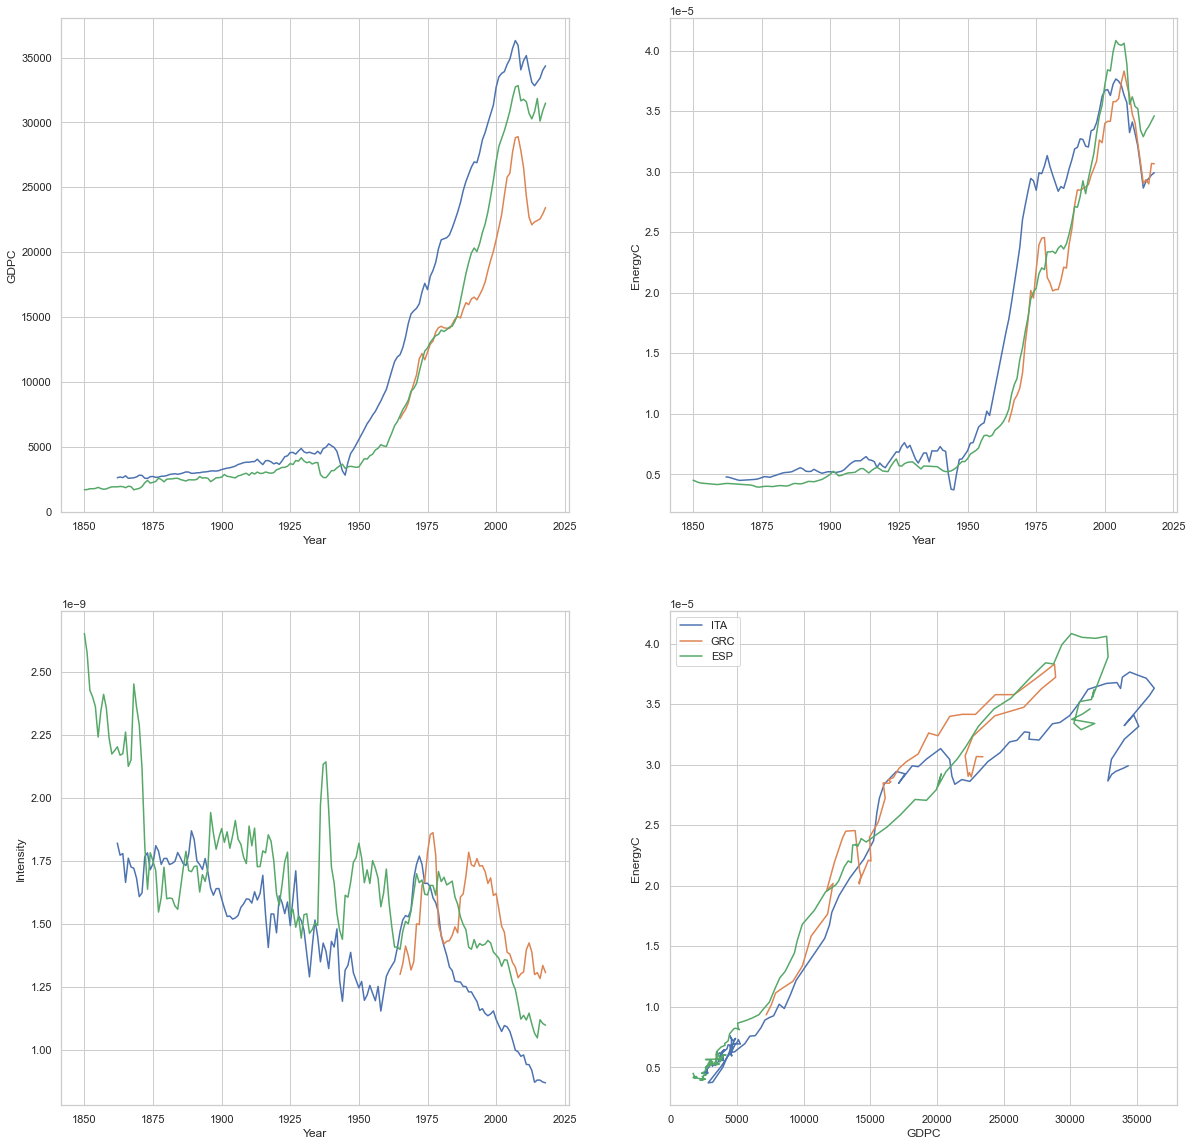

In [21]:
import data_visualization as dv
dv.comparative_plot_bis(countries= ['ITA', 'GRC', 'ESP'], x_data=['Year', 'Year', 'Year', 'GDPC'], y_data=['GDPC', 'EnergyC', 'Intensity', 'EnergyC' ])


(0.0, 8250.0)

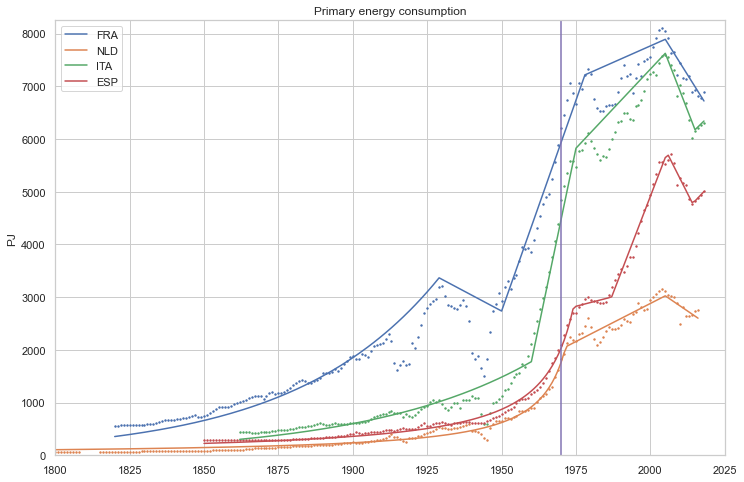

In [29]:
FRA = pd.read_csv('../BDD/final_tables/FRA.csv')
NLD = pd.read_csv('../BDD/final_tables/NLD.csv')
ITA= pd.read_csv('../BDD/final_tables/ITA.csv')
JPN= pd.read_csv('../BDD/final_tables/JPN.csv')
GBR = pd.read_csv('../BDD/final_tables/GBR.csv')
ESP = pd.read_csv('../BDD/final_tables/ESP.csv')
plt.figure(figsize=(12,8))
plt.scatter(FRA['Year'], FRA['Primary energy (PJ)'], s=2)
plt.plot(FRA['Year'], FRA['Energy(PJ)-Time(Year)'], label='FRA')
plt.scatter(NLD['Year'], NLD['Primary energy (PJ)'], s=2)
plt.plot(NLD['Year'], NLD['Energy(PJ)-Time(Year)'], label='NLD')
plt.scatter(ITA['Year'], ITA['Primary energy (PJ)'], s=2)
plt.plot(ITA['Year'], ITA['Energy(PJ)-Time(Year)'], label='ITA')
plt.scatter(ESP['Year'], ESP['Primary energy (PJ)'], s=2)
plt.plot(ESP['Year'], ESP['Energy(PJ)-Time(Year)'], label='ESP')
plt.legend()
plt.ylabel('PJ')
plt.title('Primary energy consumption')
plt.plot([1970,1970],[0,8250])
plt.xlim(1800,2025)
plt.ylim(0, 8250)

In [23]:
FRA.head()

,Year,GDP per capita,Entity,Code,Population,Primary energy (PJ),Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year)
0,1820,1809.0,France,FRA,31549988,560.619,149.153036,355.825848,7.769431e+10,0.005144,9.438880e-09
1,1821,1953.0,France,FRA,31700048,564.377,150.152854,363.238036,7.817200e+10,0.005664,9.401040e-09
2,1822,1875.0,France,FRA,31853160,568.135,151.152673,370.804628,7.865561e+10,0.005429,9.363200e-09
3,1823,1934.0,France,FRA,32007456,571.892,152.152225,378.528839,7.914523e+10,0.005663,9.325360e-09
4,1824,1986.0,France,FRA,32163920,575.488,153.108943,386.413953,7.964099e+10,0.005874,9.287521e-09


(0.0, 2550000000000.0)

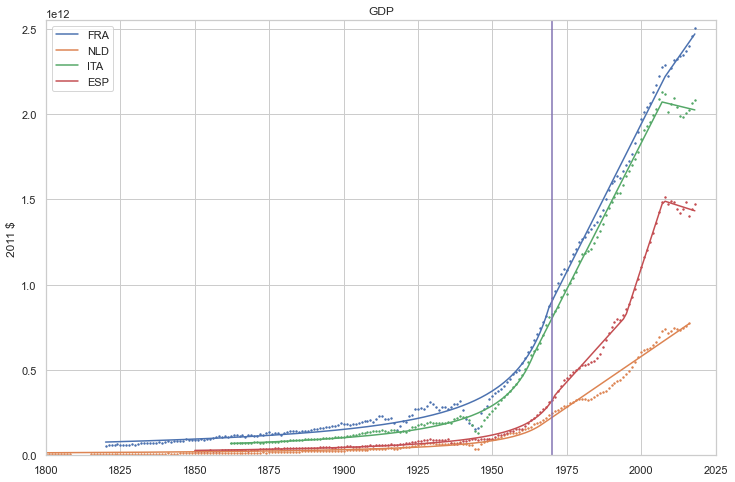

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(FRA['Year'], FRA['GDP per capita']*FRA['Population'], s=2)
plt.plot(FRA['Year'], FRA['GDP(2011$)-Time(year)'], label='FRA')
plt.scatter(NLD['Year'], NLD['GDP per capita']*NLD['Population'], s=2)
plt.plot(NLD['Year'], NLD['GDP(2011$)-Time(year)'], label='NLD')
plt.scatter(ITA['Year'], ITA['GDP per capita']*ITA['Population'], s=2)
plt.plot(ITA['Year'], ITA['GDP(2011$)-Time(year)'], label='ITA')
plt.scatter(ESP['Year'], ESP['GDP per capita']*ESP['Population'], s=2)
plt.plot(ESP['Year'], ESP['GDP(2011$)-Time(year)'], label='ESP')
plt.ylabel('2011 $')
plt.legend()
plt.title('GDP')
plt.plot([1970,1970],[0,2.55*10**12])
plt.xlim(1800,2025)
plt.ylim(0, 2.55*10**12)

In [25]:
ITA.columns

Index(['Year', 'GDP per capita', 'Entity', 'Code', 'Population',
       'Primary energy (PJ)', 'Primary energy (TWh)', 'Energy(PJ)-Time(Year)',
       'Energy(PJ)-GDP(10e12$)', 'EI(PJ/$)-Time(year)',
       'GDP(2011$)-Time(year)'],
      dtype='object')

In [ ]:
FRA = pd.read_csv('../BDD/final_tables/FRA.csv')
NLD = pd.read_csv('../BDD/final_tables/NLD.csv')
ITA= pd.read_csv('../BDD/final_tables/ITA.csv')
JPN= pd.read_csv('../BDD/final_tables/JPN.csv')
GBR = pd.read_csv('../BDD/final_tables/GBR.csv')
ESP = pd.read_csv('../BDD/final_tables/ESP.csv')